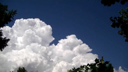

In [8]:
#hide
from utils import *
from fastai2.vision.widgets import *

search_images_bing

key1 = 'd22b36e942904df59cd2dabd203a4cfa'
key2 = '2e6df0e1de984c159270620e7647dae7'

results = search_images_bing(key1, 'clouds')
ims = results.attrgot('content_url')
len(ims)

#hide
#ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

# you have to create folder images
dest = 'clouds/nuvem.jpg'
download_url(ims[0], dest)

im = Image.open(dest)
im.to_thumb(128,128)
#

In [27]:
clouds_types = 'cumulonimbus','stratus','cirrus','cirrocumulus'
path = Path('clouds')

In [28]:
#path.mkdir()
for o in clouds_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key1, f'{o} cloud')
    download_images(dest, urls=results.attrgot('content_url'))

In [29]:
fns = get_image_files(path)
fns

(#602) [Path('clouds/cirrus/00000042.jpg'),Path('clouds/cirrus/00000102.JPG'),Path('clouds/cirrus/00000004.jpg'),Path('clouds/cirrus/00000130.jpg'),Path('clouds/cirrus/00000093.jpg'),Path('clouds/cirrus/00000120.JPG'),Path('clouds/cirrus/00000121.jpg'),Path('clouds/cirrus/00000033.jpg'),Path('clouds/cirrus/00000053.jpg'),Path('clouds/cirrus/00000077.jpg')...]

In [30]:
failed = verify_images(fns)
failed.map(Path.unlink);

In [31]:
clouds = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


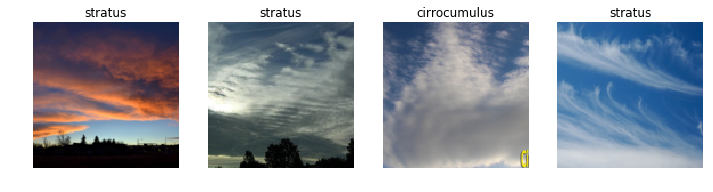

In [17]:
dls = clouds.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

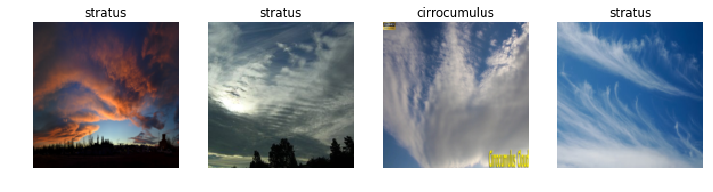

In [18]:
clouds = clouds.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = clouds.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

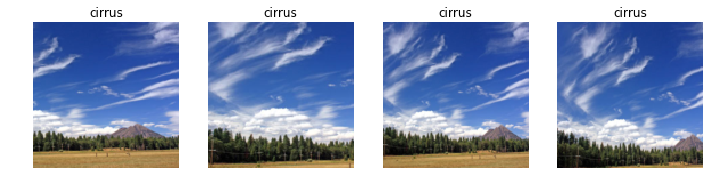

In [20]:
clouds = clouds.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = clouds.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)


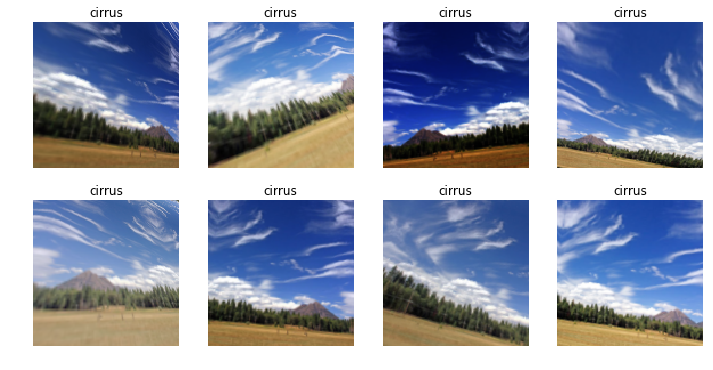

In [21]:
clouds = clouds.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = clouds.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [32]:
clouds = clouds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = clouds.dataloaders(path)

In [37]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.118587,1.593598,0.474860,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.968490,0.989944,0.396648,00:25
1,0.949226,0.688767,0.212290,00:24
2,0.830147,0.702936,0.189944,00:26
3,0.751168,0.701380,0.178771,00:26
4,0.694423,0.686159,0.178771,00:29


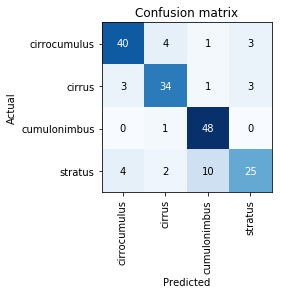

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

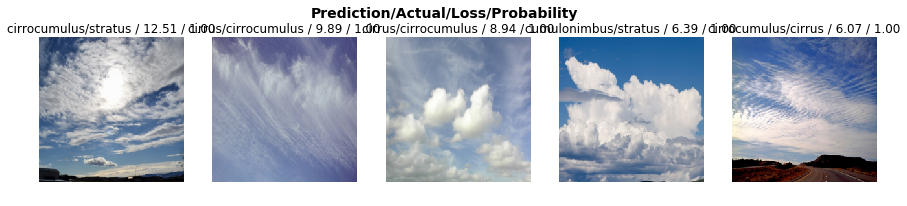

In [39]:
interp.plot_top_losses(5, nrows=1)

In [40]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [41]:
learn.export()

In [42]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [43]:
learn_inf = load_learner(path/'export.pkl')

In [47]:
learn_inf.predict('clouds/cumulus.jpeg')

('cumulonimbus', tensor(2), tensor([0.0027, 0.0070, 0.8824, 0.1079]))

In [48]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [49]:
btn_upload = SimpleNamespace(data = ['clouds/brasilia.jpg'])

In [50]:
img = PILImage.create(btn_upload.data[-1])


In [51]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [52]:
pred,pred_idx,probs = learn_inf.predict(img)

In [53]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cumulonimbus; Probability: 0.9153')

In [54]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [55]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [56]:
btn_upload = widgets.FileUpload()

In [57]:
VBox([widgets.Label('Select your cloud image'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [59]:
!jupyter serverextension enable voila --sys-prefix

Enabling: voila
- Writing config: /usr/etc/jupyter
Traceback (most recent call last):
  File "/home/vinicius/.local/bin/jupyter-serverextension", line 11, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.6/dist-packages/jupyter_core/application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/home/vinicius/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/vinicius/.local/lib/python3.6/site-packages/notebook/serverextensions.py", line 293, in start
    super(ServerExtensionApp, self).start()
  File "/usr/local/lib/python3.6/dist-packages/jupyter_core/application.py", line 259, in start
    self.subapp.start()
  File "/home/vinicius/.local/lib/python3.6/site-packages/notebook/serverextensions.py", line 212, in start
    self.toggle_server_extension(arg)
  File "/home/vinicius/.local/lib/python3.6/site-packages/notebook/serverextensi

In [60]:
!jupyter serverextension enable voila

Enabling: voila
- Writing config: /home/vinicius/.jupyter
    - Validating...
      voila  OK
